In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Automobile/Tasla_Stock_Updated_V2.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [4]:
data.set_index('Date', inplace=True)

In [5]:
data.head(20)

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500
2015-01-09,5,13.928000,13.998667,13.664000,13.777333,70024500
2015-01-12,6,13.536667,13.631333,13.283333,13.480667,89254500
2015-01-13,7,13.554667,13.840667,13.394000,13.616667,67159500
2015-01-14,8,12.388667,13.013333,12.333333,12.846000,173278500


This is Tesla Stock Price from 2015-01-02 to 2024-01-16

In [6]:
pd.to_datetime(data.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16'],
              dtype='datetime64[ns]', name='Date', length=2274, freq=None)

In [7]:
#data = data.sort_values(by='Date')

In [8]:
data.drop(['Unnamed: 0'],axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...
2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600


In [9]:
data.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Open        2274 non-null   float64
 2   High        2274 non-null   float64
 3   Low         2274 non-null   float64
 4   Close       2274 non-null   float64
 5   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 124.4+ KB


# Data Visualization

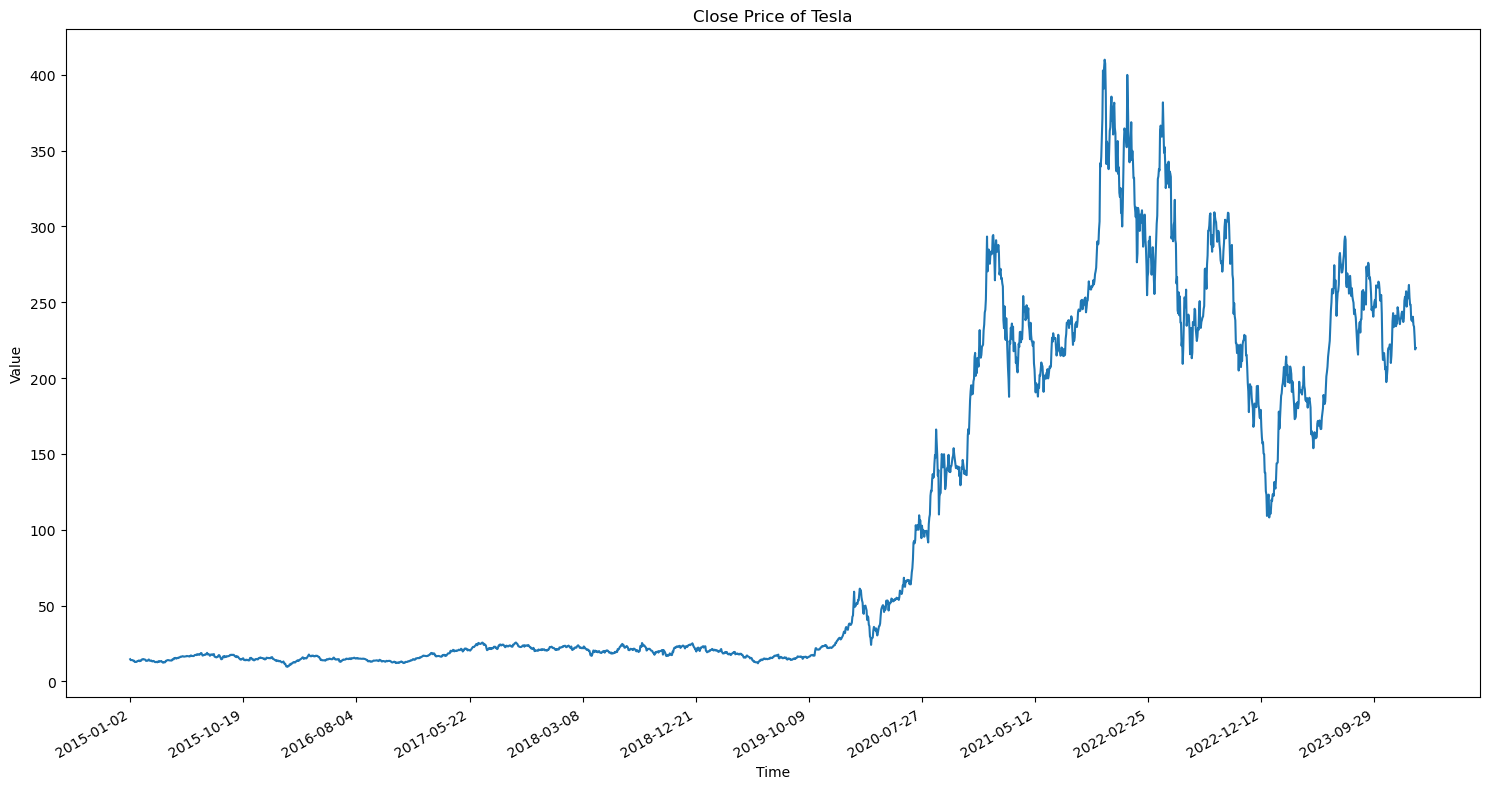

In [11]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Close'], label='Adj Close')
ax.set_title('Close Price of Tesla')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2274,200))
pt.tight_layout()

The stock starts to has an increase trend at around 2020 until Q3 of 2021. 

https://time.com/6243613/why-tesla-stock-down/

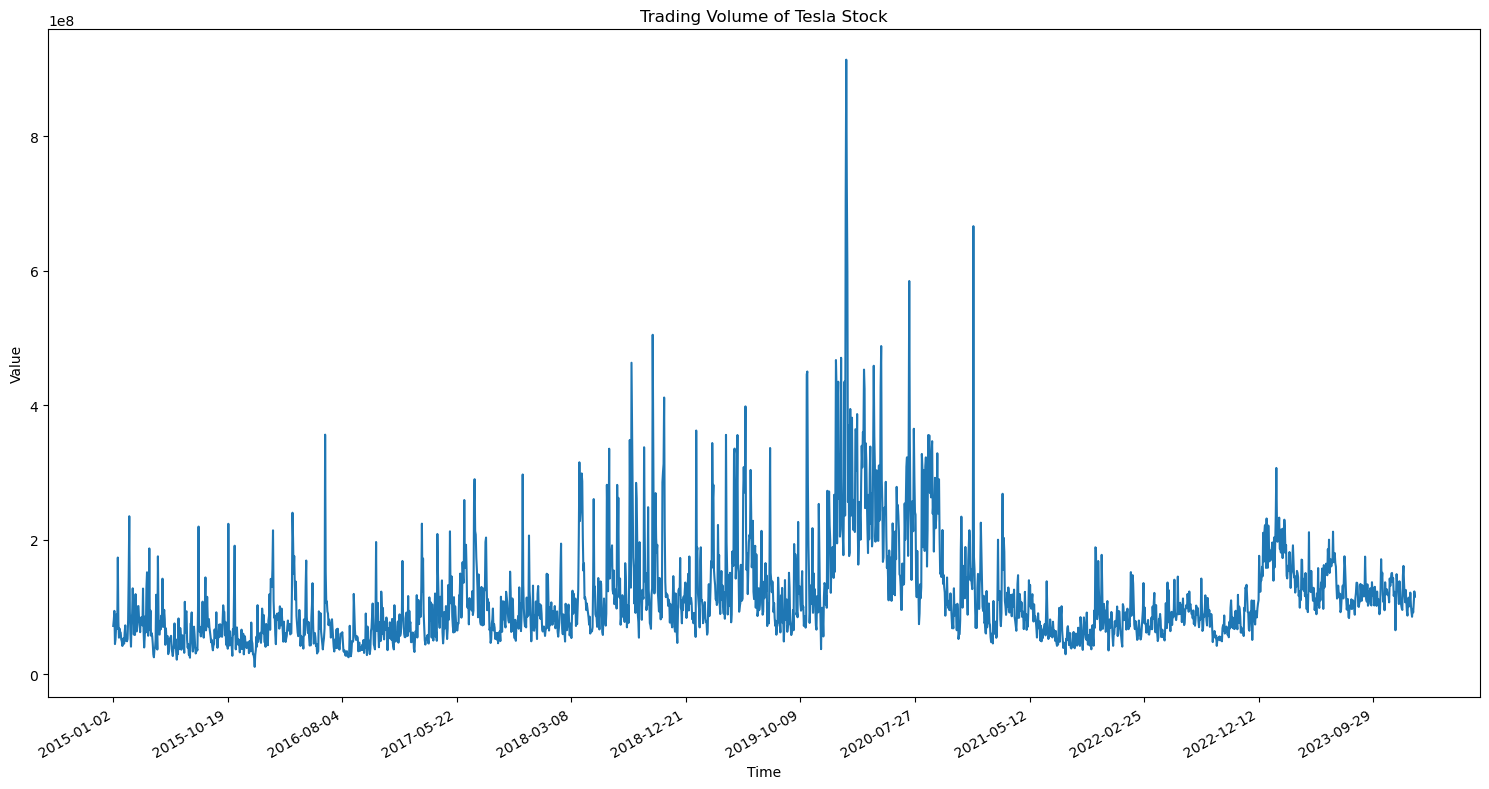

In [12]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Volume'], label='Volume')
ax.set_title('Trading Volume of Tesla Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2274,200))
pt.tight_layout()

It appears that the traders are holding onto their stock when the market starts to decrease

R-Value:  0.8222156400996747
P-Value:  0.0
Std Err:  0.0020192748121534874


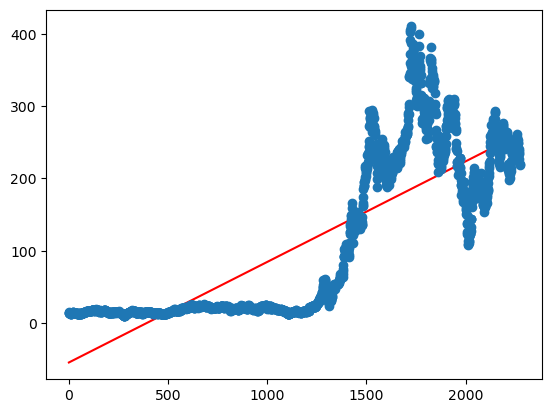

In [13]:
xi = np.arange(0,2274)
y = data['Close']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The Tesla Stock closing price is linear with time.

In [14]:
std_dev = data['Close'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['Close'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 111.03201925347982
 Mean: 103.46179386095301
 Coefficient Variance: 107.31692841388463 %


# Moving Average Window

In [15]:
data['Moving Average (20)'] = data['Close'].rolling(window=20).mean()
data['Moving Average (100)'] = data['Close'].rolling(window=100).mean()

In [16]:
data.head(20)

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100)
Date,,,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500,NaN,NaN
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500,NaN,NaN
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000,NaN,NaN
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500,NaN,NaN
2015-01-09,5,13.928000,13.998667,13.664000,13.777333,70024500,NaN,NaN
2015-01-12,6,13.536667,13.631333,13.283333,13.480667,89254500,NaN,NaN
2015-01-13,7,13.554667,13.840667,13.394000,13.616667,67159500,NaN,NaN
2015-01-14,8,12.388667,13.013333,12.333333,12.846000,173278500,NaN,NaN


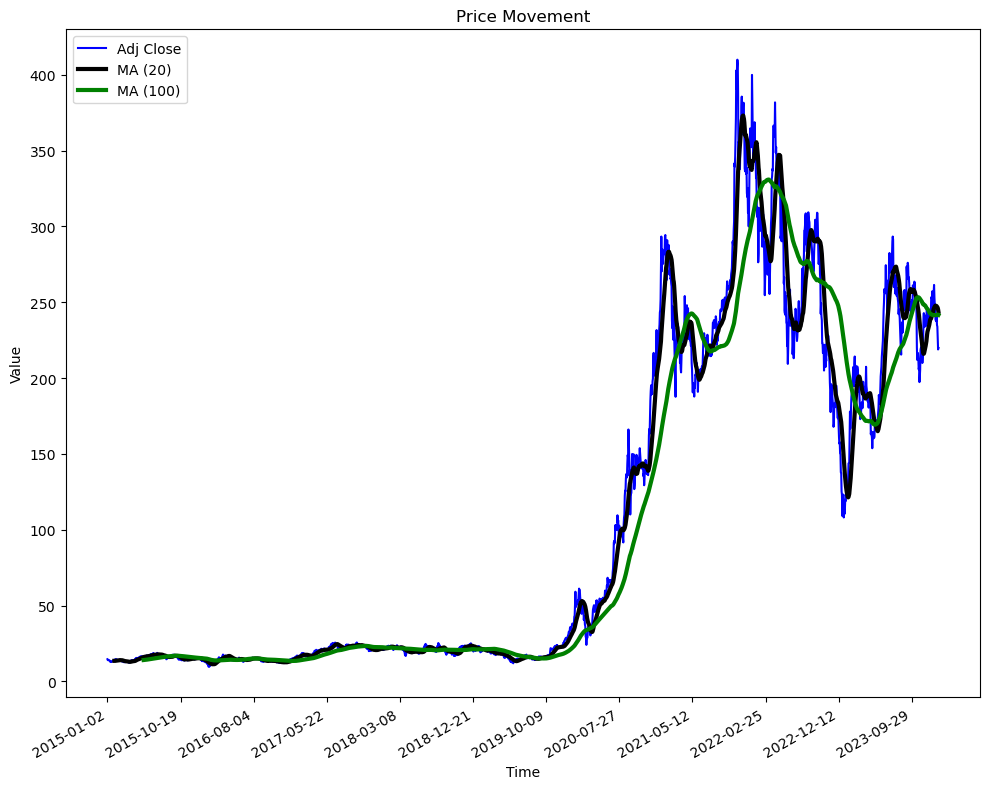

In [17]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], 'b-', label='Adj Close')
ax.plot(data['Moving Average (20)'], 'k-',label='MA (20)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2274, 200))
fig.autofmt_xdate()
pt.tight_layout()

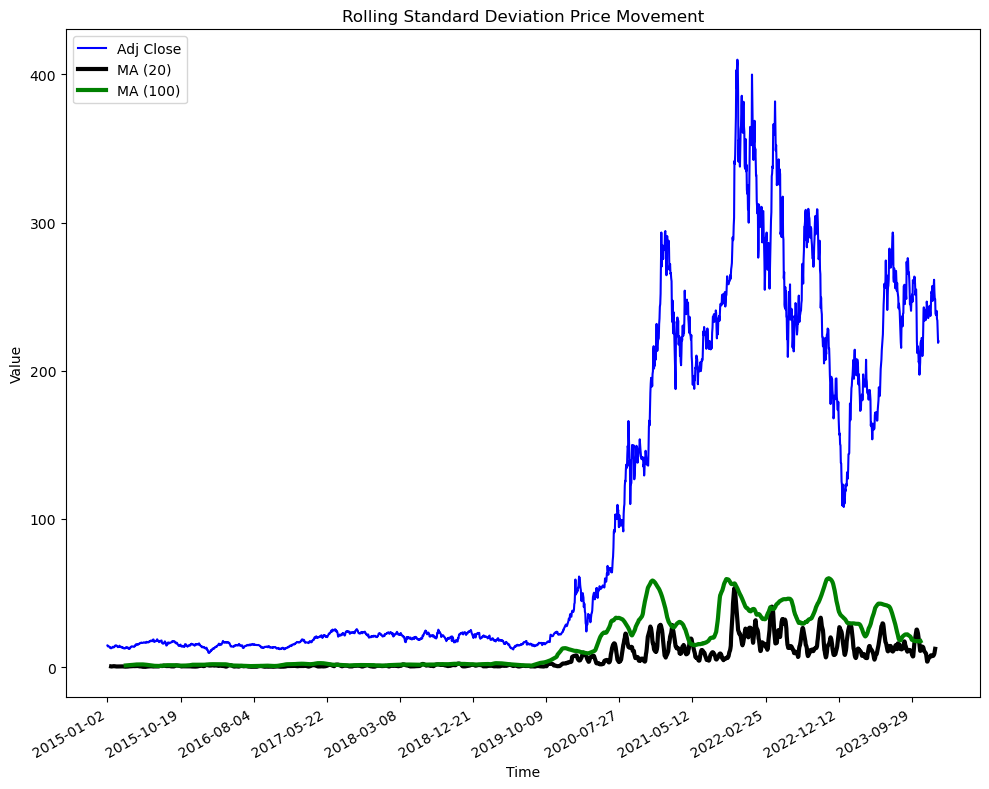

In [18]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], 'b-', label='Adj Close')
ax.plot(data['Close'].rolling(window=20, center=True).std(), 'k-', label='MA (20)', linewidth=3)
ax.plot(data['Close'].rolling(window=100, center=True).std(), 'g-',label='MA (100)', linewidth=3)
ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2274, 200))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant at the beginning and starts to increase towards the end

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [19]:
data['Daily Return'] = data['Close'].pct_change()
data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN,NaN
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500,NaN,NaN,-0.042041
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500,NaN,NaN,0.005664
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000,NaN,NaN,-0.001562
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500,NaN,NaN,-0.001564


In [20]:
data.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2024-01-09,2269,238.110001,238.960007,232.039993,234.960007,96705700,247.073998,241.650899,-0.022832
2024-01-10,2270,235.100006,235.500000,231.289993,233.940002,91628500,246.783998,241.798099,-0.004341
2024-01-11,2271,230.570007,230.929993,225.369995,227.220001,105873600,246.294498,241.915399,-0.028725
2024-01-12,2272,220.080002,225.339996,217.149994,218.889999,122889000,245.274499,241.791499,-0.036661
2024-01-16,2273,215.100006,223.490005,212.180099,219.910004,115064708,243.717499,241.658699,0.004660


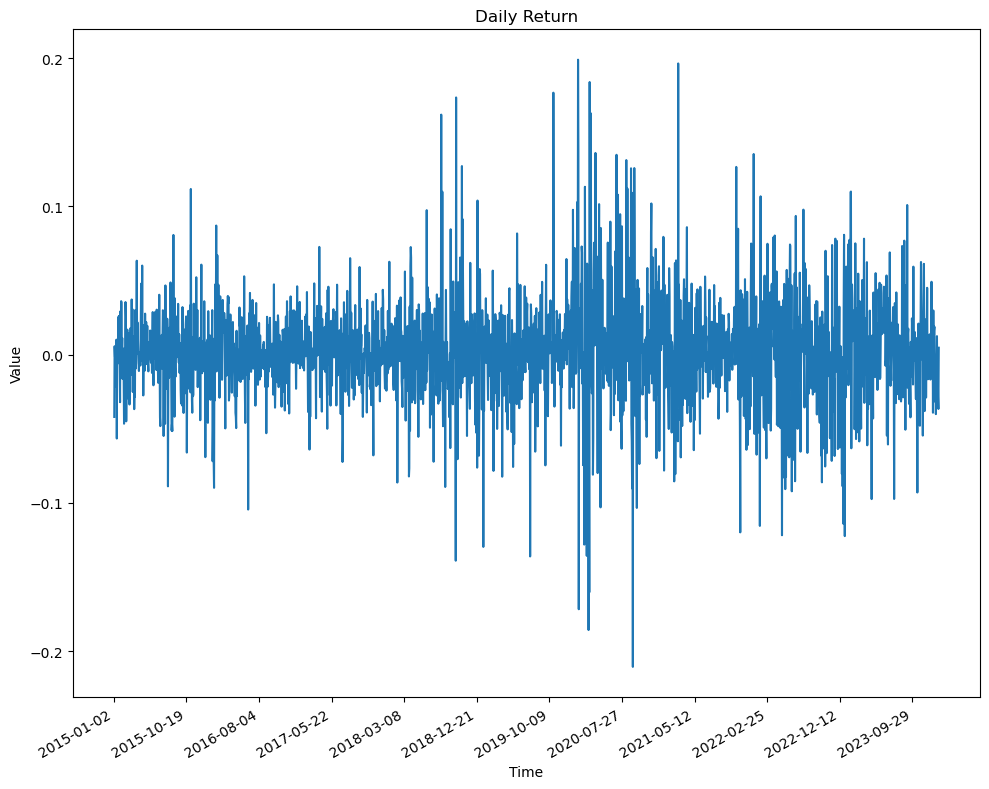

In [21]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,2274,200))
fig.autofmt_xdate()
pt.tight_layout()

Only the highest price of the day is relevant to our Closing Price

# Stationary Check

In [22]:
adf_results = adfuller(data['Close'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: -1.2114232360565207
 P-Value: 0.6686625213787416


In [23]:
adf_results = adfuller(np.diff(data['Close'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -9.523146432144008
 P-Value: 3.0268790694074695e-16
 The time series is stationary


In [24]:
data_diff = np.diff(data['Close'], n=1)

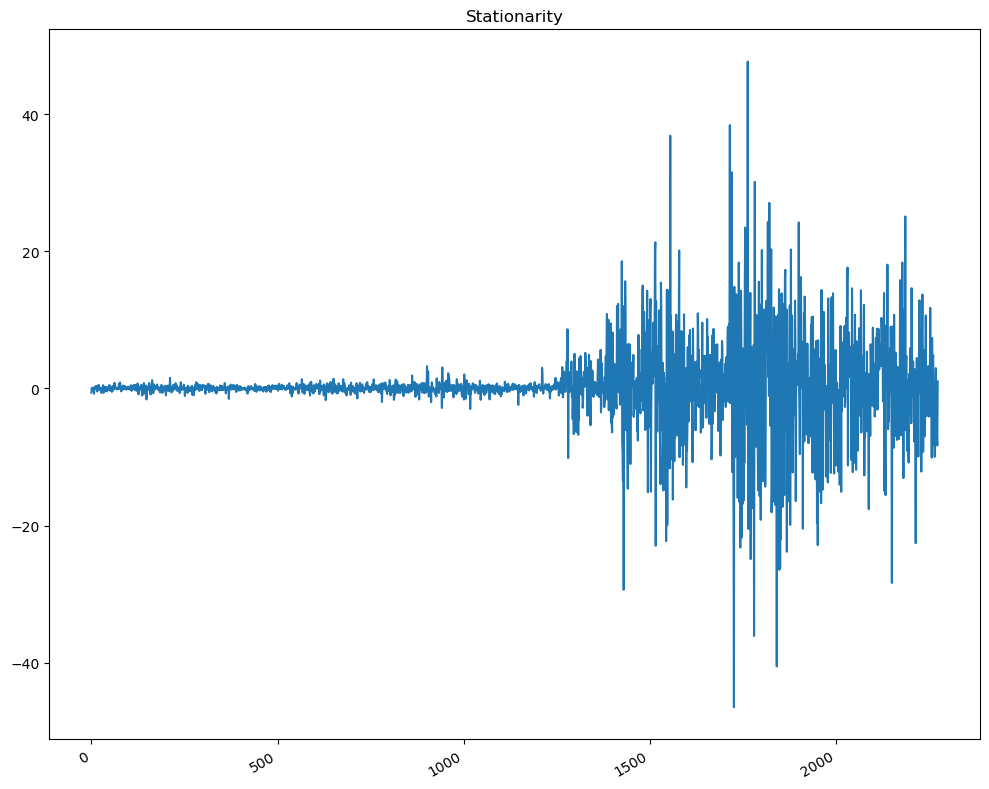

In [25]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

First-Order integration. As expected, at around 2020 the tesla stock prices starts to increase significantly causing the market to be volatile, resulting in increasing variance.

<function plot_acf at 0x00000232C33F4860>


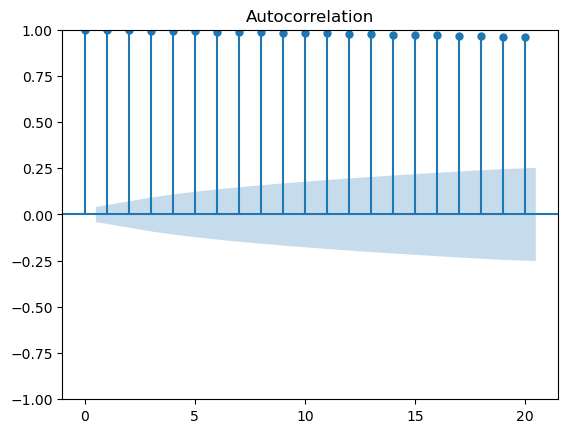

In [26]:
plot_acf(data['Close'], lags=20)
print(plot_acf)

<function plot_pacf at 0x00000232C33F4720>


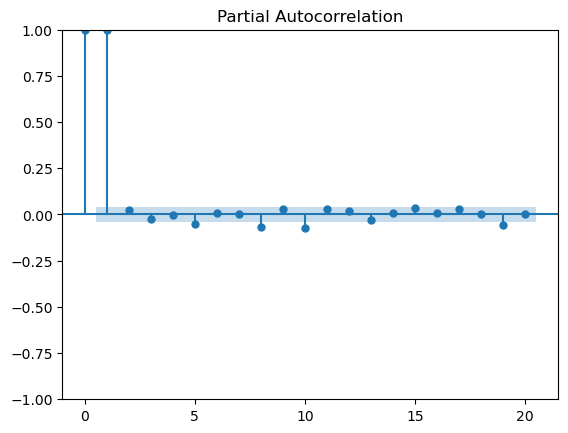

In [27]:
plot_pacf(data['Close'], lags=20)
print(plot_pacf)

# Model Selection

In [28]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [29]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 1

arima_list = list(product(ps,qs))

In [30]:
train = data['Close'][:-251]
test = data['Close'][-251:]

In [31]:
train.shape

(2023,)

In [32]:
test.shape

(251,)

In [33]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_16196\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

,"(p,q)",AIC
0,"(8, 8)",12549.649722
1,"(7, 7)",12570.617448
2,"(7, 8)",12572.243655
3,"(8, 7)",12572.545300
4,"(9, 7)",12573.880788
...,...,...
95,"(2, 2)",12648.840431
96,"(3, 1)",12649.186018
97,"(6, 0)",12649.247549
98,"(5, 1)",12649.660733


Previously I limit my order list to be maximum of 4 and as a result the best model is ARIMA(3,1,1). However, the predictions are extremely off the actual data. So, now I use a higher order list to see it'll be better. This time the best model is ARIMA(3,1,6)

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew

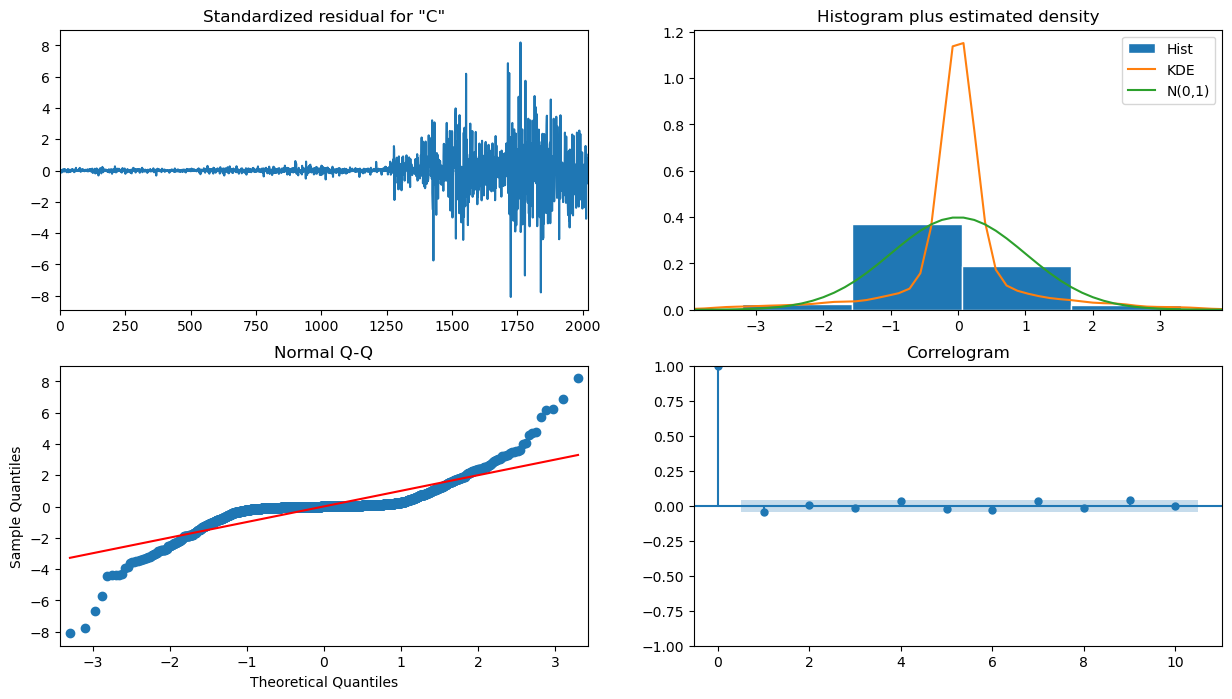

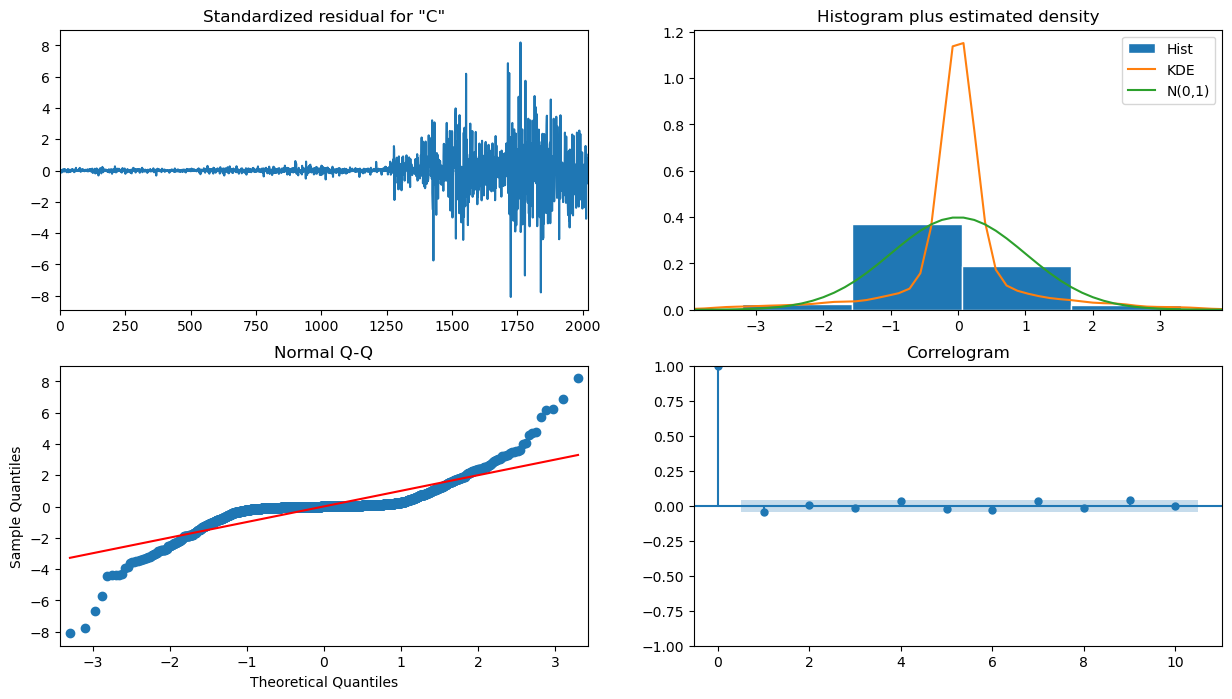

In [34]:
arima_model = SARIMAX(train, order=(8,1,8), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [35]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    3.700825   0.054386
2    3.770106   0.151821
3    4.490279   0.213159
4    7.269686   0.122305
5    8.605984   0.125850
6   10.662015   0.099401
7   12.763123   0.078095
8   13.300330   0.101925
9   16.112922   0.064561
10  16.112982   0.096444
11  17.574237   0.092000
12  20.854818   0.052547
13  21.490009   0.063785
14  21.520897   0.089009
15  21.846082   0.111904
16  21.951271   0.144772
17  22.230261   0.176025
18  26.119454   0.097058
19  27.992667   0.083570


The ARIMA Model (8,1,8) seems fairly good, the residuals are correlated to white noise.

The ARIMA Model (3,1,6) seems fairly good as well.

# Forecasting

In [36]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(8, 1, 8))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

# Predicting the next year stock prices of Tesla Stock - From 2023-1-16 to 2024-1-16

In [37]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_arima = rolling_forecast(data['Close'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew

In [38]:
predicted_data = pd.DataFrame({'Actual Data': data['Close'][-251:]})
predicted_data.head()

,Actual Data
Date,
2023-01-17,131.490005
2023-01-18,128.779999
2023-01-19,127.169998
2023-01-20,133.419998
2023-01-23,143.750000


In [39]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
Date,,
2023-01-17,131.490005,122.704211
2023-01-18,128.779999,132.289787
2023-01-19,127.169998,128.171731
2023-01-20,133.419998,127.717261
2023-01-23,143.750000,135.792458


In [40]:
predicted_data.head(20)

,Actual Data,Predicted Data
Date,,
2023-01-17,131.490005,122.704211
2023-01-18,128.779999,132.289787
2023-01-19,127.169998,128.171731
2023-01-20,133.419998,127.717261
2023-01-23,143.750000,135.792458
2023-01-24,143.889999,141.162766
2023-01-25,144.429993,144.591240
2023-01-26,160.270004,142.863069
2023-01-27,177.899994,159.990659


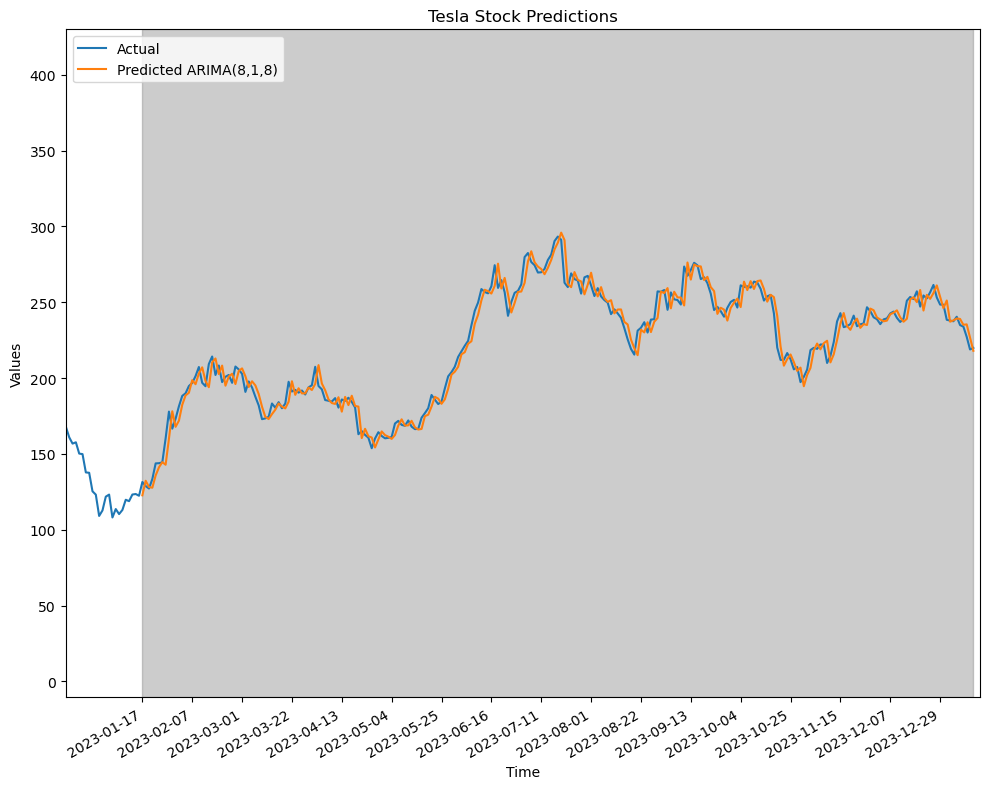

In [41]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(8,1,8)')
ax.set_title('Tesla Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(2000, 2275)
ax.axvspan(2023, 2273, color="#808080", alpha=0.4)
pt.xticks(np.arange(2023, 2273,15))
fig.autofmt_xdate()
pt.tight_layout()

In [42]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 51.46732269328794


In [43]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5.539332771541777


In [44]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 1422.398412689512


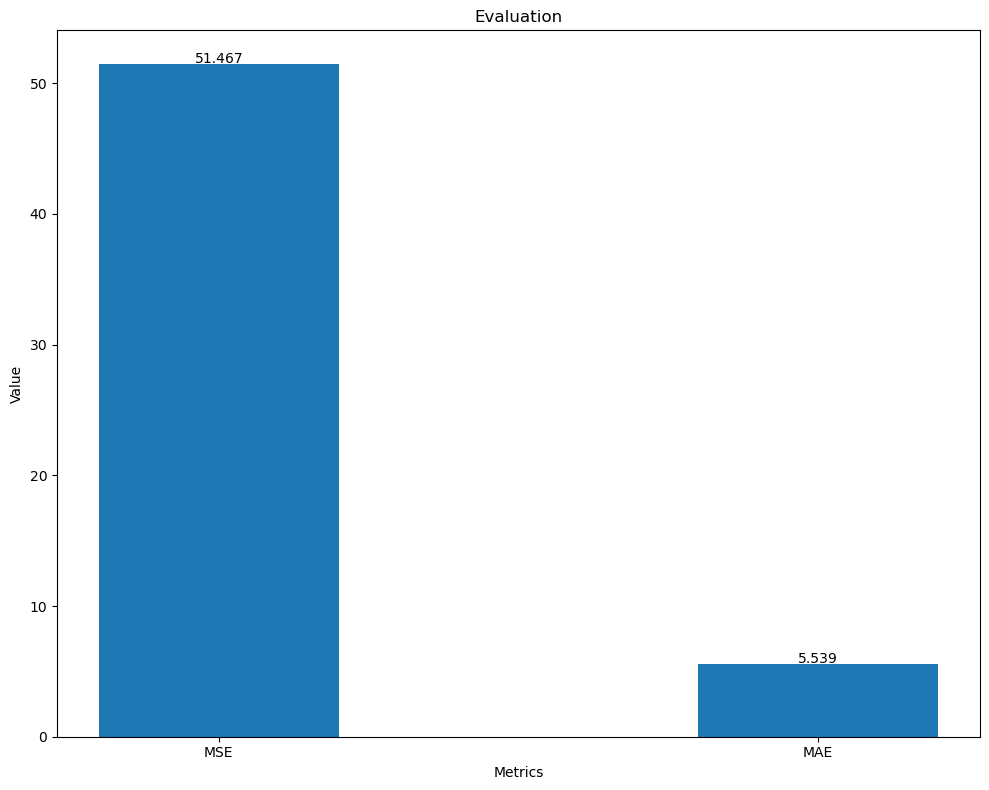

In [47]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [51.467, 5.539]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

It seems that the reason that the previous approach performs so poor its due to scaling and PCA the data. In this approach, the model is able to perform very well by capturing the pattern and yield low MSE scoring. Let's try and see if we use smaller parameter will improve the performance of the model.

In [45]:
ps = range(0,4,1)
qs = range(0,4,1)
d = 1

arima_list = list(product(ps,qs))

In [46]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_16196\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

,"(p,q)",AIC
0,"(3, 2)",12609.040569
1,"(2, 3)",12610.980952
2,"(3, 3)",12623.106650
3,"(1, 0)",12643.773153
4,"(0, 1)",12643.879294
5,"(1, 1)",12644.846687
6,"(0, 0)",12644.897977
7,"(2, 0)",12645.195610
8,"(0, 2)",12645.250588
9,"(1, 3)",12645.359589


C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


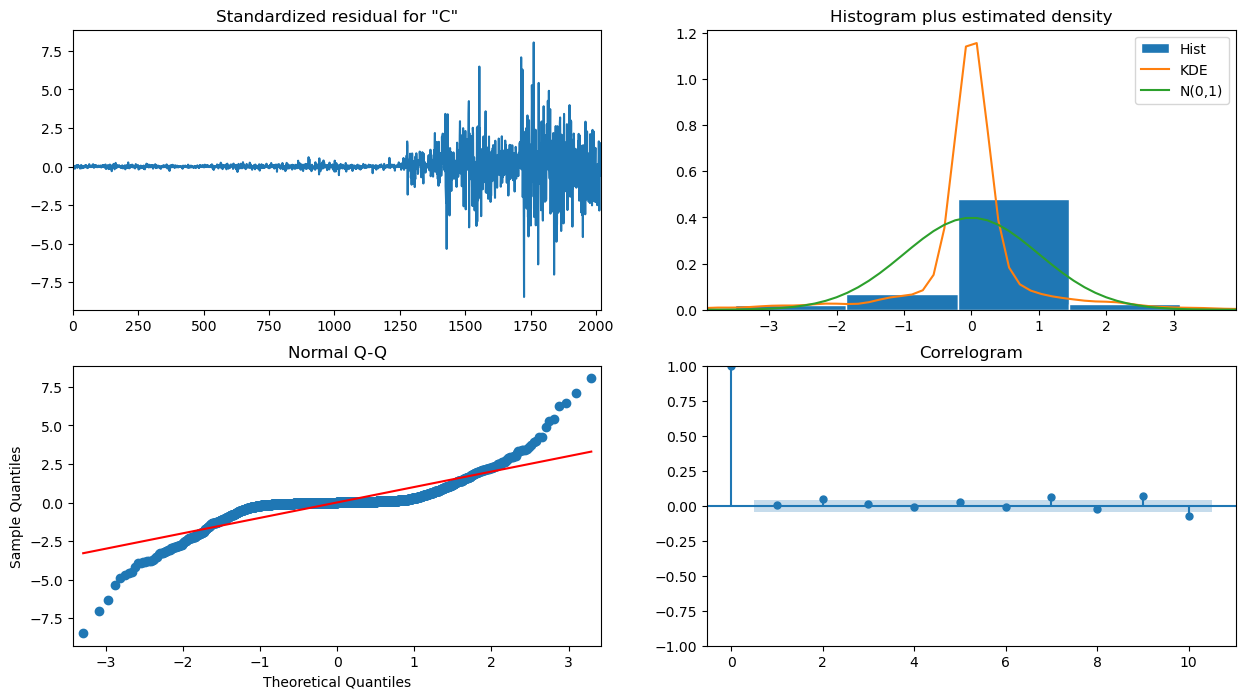

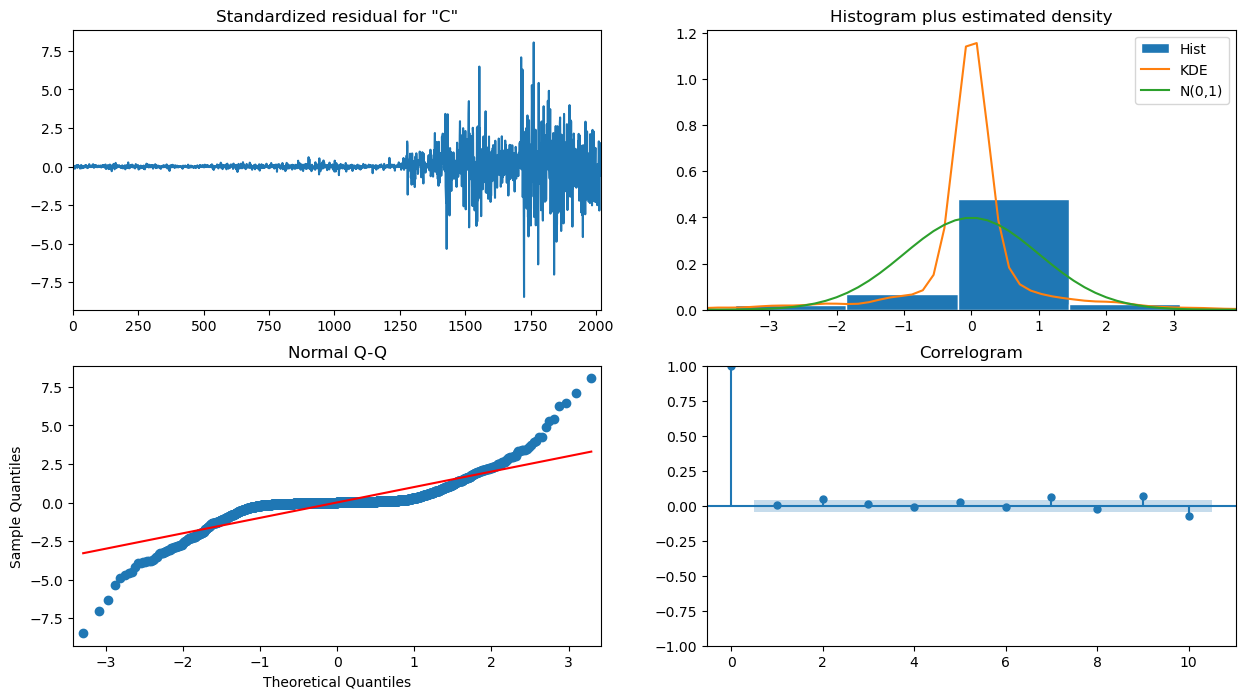

In [48]:
arima_model = SARIMAX(train, order=(3,1,2), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [49]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    0.040780   0.839964
2    4.380395   0.111895
3    4.853799   0.182821
4    4.967591   0.290639
5    6.149910   0.291904
6    6.273401   0.393271
7   13.833981   0.054214
8   15.150397   0.056286
9   25.418704   0.002541
10  35.591942   0.000099
11  36.649099   0.000132
12  36.709466   0.000249
13  36.760028   0.000452
14  37.757549   0.000566
15  41.693844   0.000250
16  41.894157   0.000409
17  41.959627   0.000680
18  52.848838   0.000028
19  52.971649   0.000047


In [50]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(3, 1, 2))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

In [51]:
TRAIN = len(train)
HORIZOn = len(test)
WINDOW = 1

pred_arima = rolling_forecast(data['Close'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

In [52]:
predicted_data = pd.DataFrame({'Actual Data': data['Close'][-251:]})
predicted_data.head()

,Actual Data
Date,
2023-01-17,131.490005
2023-01-18,128.779999
2023-01-19,127.169998
2023-01-20,133.419998
2023-01-23,143.750000


In [53]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
Date,,
2023-01-17,131.490005,121.547083
2023-01-18,128.779999,130.867982
2023-01-19,127.169998,127.265293
2023-01-20,133.419998,127.647248
2023-01-23,143.750000,134.081992


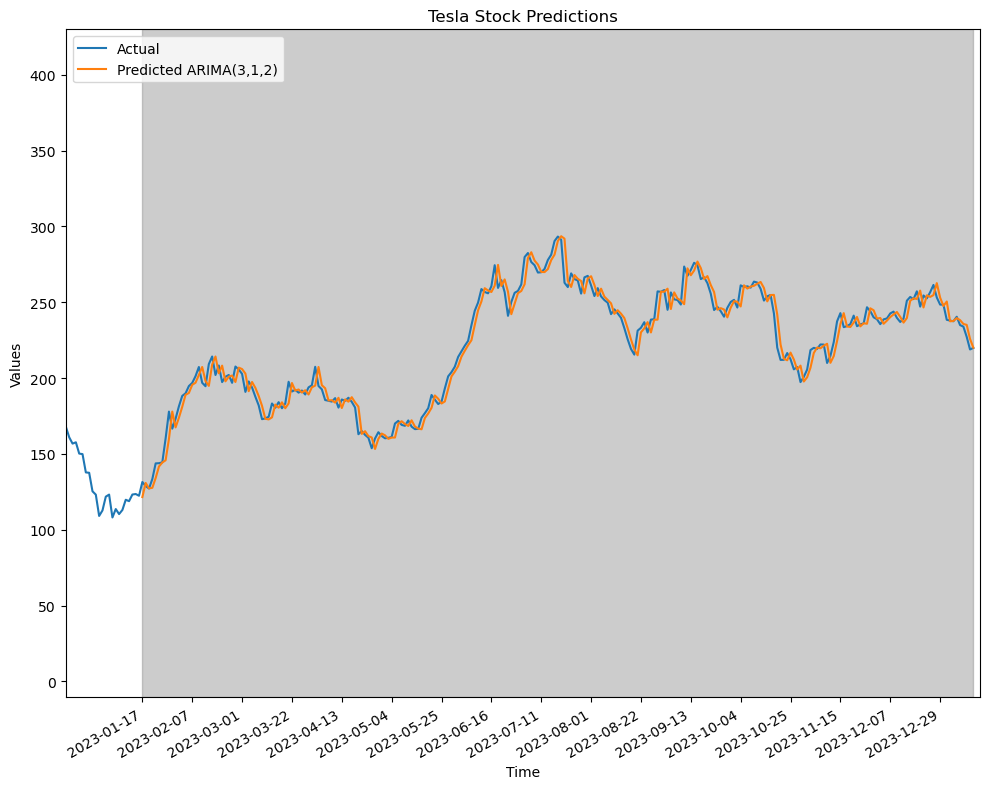

In [54]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(3,1,2)')
ax.set_title('Tesla Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(2000, 2275)
ax.axvspan(2023, 2273, color="#808080", alpha=0.4)
pt.xticks(np.arange(2023, 2273,15))
fig.autofmt_xdate()
pt.tight_layout()

In [55]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 50.200186935597294


In [56]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5.35472803944903


In [57]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 1423.1587980145182


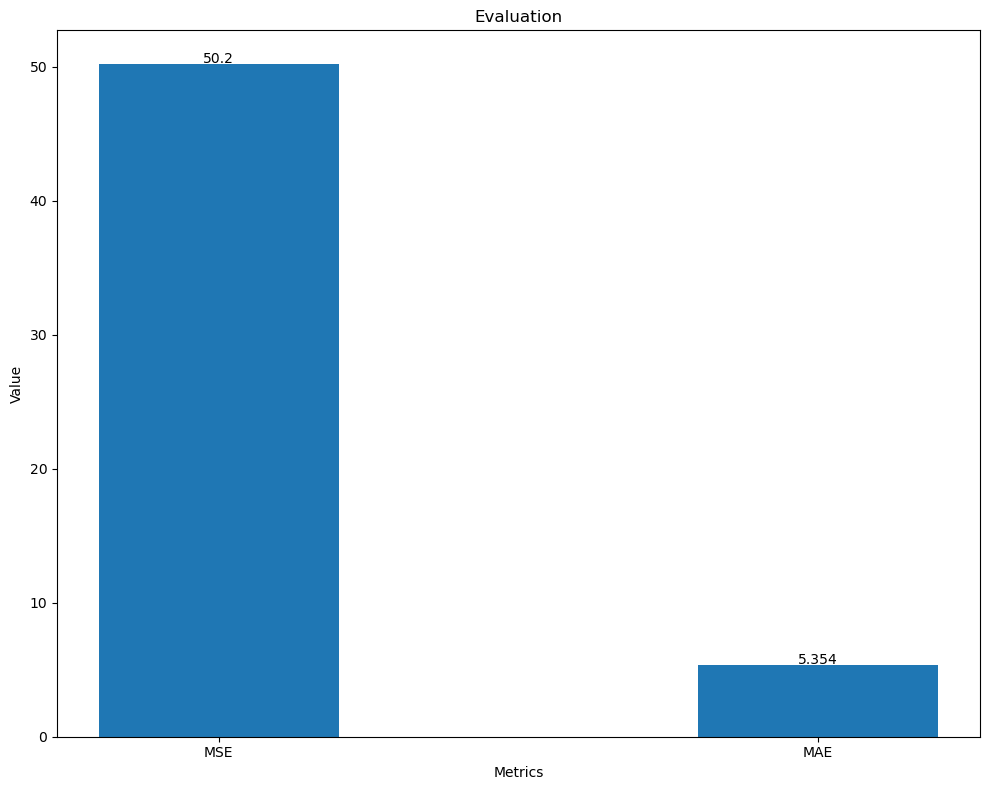

In [58]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [50.2, 5.354]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

As a result, with a smaller parameter, the model is able to perform just a tiny little bit better than the ARIMA(8,1,8). Though it perform just a tiny bit better, the runtime is way faster than the ARIMA(8,1,8).